# Experiment 7: Clique Percolation Method (CPM)

**Aim**: Implementation clique percolation algorithm for community detection.

**Theory**:
CPM identifies overlapping communities by finding k-cliques that share k-1 nodes.
We assume k=3 (triangles).

**Setup**:
We construct a network with two overlapping cliques to demonstrate the capability of CPM to detect overlaps.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import k_clique_communities


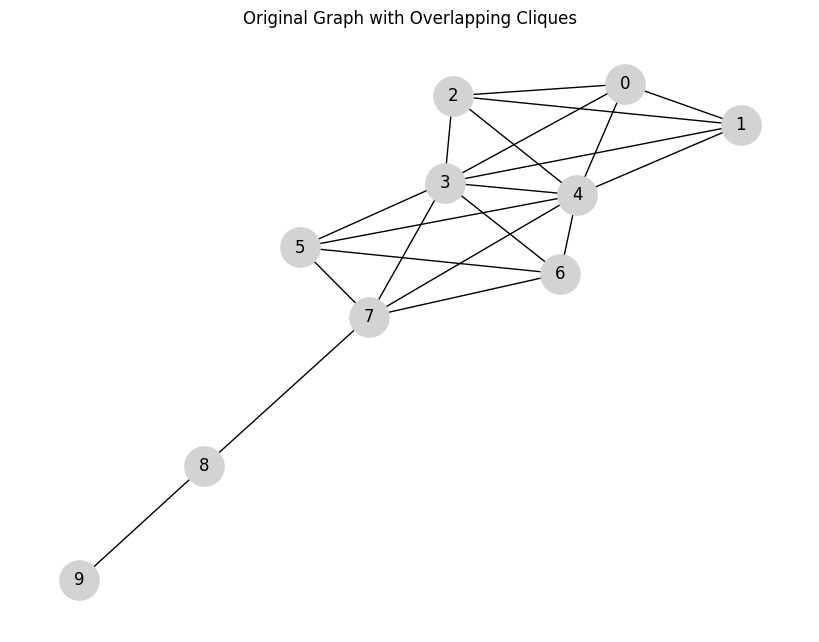

In [2]:
# Create a Graph with overlapping structure
G = nx.Graph()

# Community 1: Nodes 0-4 (Clique of size 5)
nx.add_path(G, range(5))
G.add_edges_from([(i, j) for i in range(5) for j in range(i + 1, 5)])

# Community 2: Nodes 3-7 (Clique of size 5) -> Overlap at 3,4
nx.add_path(G, range(3, 8))
G.add_edges_from([(i, j) for i in range(3, 8) for j in range(i + 1, 8)])

# Add some outliers
G.add_edge(7, 8)
G.add_edge(8, 9)

# Visualization
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=800)
plt.title("Original Graph with Overlapping Cliques")
plt.show()


In [3]:
# Apply CPM (k=3)
k = 3
cpm_communities = list(k_clique_communities(G, k))

print(f"Detected {k}-Clique Communities:")
for i, comm in enumerate(cpm_communities):
    print(f"Community {i+1}: {sorted(list(comm))}")


Detected 3-Clique Communities:
Community 1: [0, 1, 2, 3, 4, 5, 6, 7]


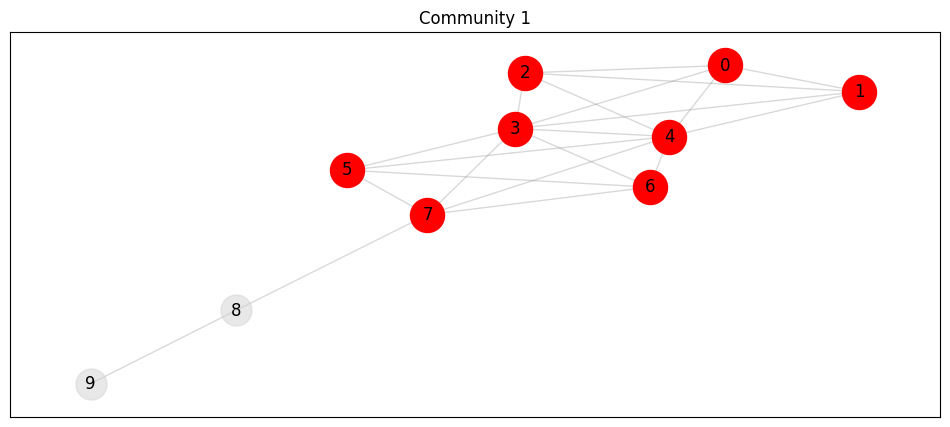

In [4]:
# Visualize Communities
# Since communities can overlap, we can't just color nodes uniquely.
# We will focus on showing which nodes belong to which community.

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 5))

colors = ['red', 'blue', 'green', 'purple']

for i, comm in enumerate(cpm_communities):
    plt.subplot(1, len(cpm_communities), i+1)
    
    # Base graph
    nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=500, alpha=0.5)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)
    
    # Community nodes
    nx.draw_networkx_nodes(G, pos, nodelist=list(comm), node_color=colors[i % len(colors)], node_size=600, label=f"Comm {i+1}")
    nx.draw_networkx_labels(G, pos)
    
    plt.title(f"Community {i+1}")
    
plt.show()


**Observation and Conclusion**:
1. CPM successfully identified dense structures (cliques).
2. Nodes 3 and 4 belong to BOTH communities, illustrating the overlapping nature of the method.
3. Nodes 8 and 9 were not part of any 3-clique community as they don't form triangles sharing edges sufficient to percolate.
